In [1]:
import torch
#from fastai.vision import *
from fastai.vision import Path,get_image_files,open_image,get_transforms,ImageDataBunch,imagenet_stats,cnn_learner,models,ClassificationInterpretation
import pandas as pd
import numpy as np
import warnings
from fastai.metrics import error_rate
from fastai.vision import Path

warnings.filterwarnings('ignore')
np.random.seed(2)

from fastai import *
from fastai.vision import *
from fastai.core import *

In [ ]:
#pip install fastai==1.0.61

In [15]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [16]:
path = 'gdrive/MyDrive/Saved_model'

In [30]:
learn = load_learner(path, 'saved_model.pkl')

In [31]:
labels = pd.read_csv('gdrive/MyDrive/labels.csv')
label = labels.values.tolist()

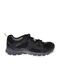

In [38]:
img = open_image('gdrive/MyDrive/test_imgs/1929.jpg')
img


In [39]:
x = learn.predict(img)
x = x[1].item()
label[x]

['Men-Shoes']

In [40]:
predictions =[]

In [ ]:
!unzip gdrive/MyDrive/insta_img.zip 

In [25]:
image_path = 'insta_img/'

In [41]:
for image in os.listdir(image_path):
  test_img = open_image(f'{image_path}/{image}')
  x = learn.predict(test_img)
  x = x[1].item()
  x = label[x]
  predictions.append(x)

In [67]:
from itertools import chain
flatten_list = list(chain.from_iterable(predictions))
trend = [[x,flatten_list.count(x)] for x in set(flatten_list)]
trend = list(chain.from_iterable(trend))

def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct
trend = Convert(trend)
trend = sorted(trend.items(), key=lambda x: x[1], reverse=True)
trend

[('Shirts-Women', 173),
 ('Sarees-Women', 93),
 ('Tshirts-Men', 57),
 ('Watches-Men', 54),
 ('Shirts-Men', 48),
 ('Kurtas-Women-Topwear', 44),
 ('Watches-Women', 26),
 ('Jeans-Men-Bottomwear', 25),
 ('Jackets-Men-Topwear', 17),
 ('Sports Shoes-Footwear', 11),
 ('Socks-Accessories', 7),
 ('Shorts-Men', 6),
 ('Trousers-Women', 6),
 ('Nightdress-Women', 5),
 ('Watches-Unisex', 5),
 ('Tshirts-Women', 5),
 ('Kurta Sets-Women', 4),
 ('Backpacks-Unisex', 4),
 ('Clutches-Women-Bags', 3),
 ('Handbags-Women', 3),
 ('Track Pants-Women', 2),
 ('Trousers-Men', 2),
 ('Sandals-Men', 2),
 ('Men-Shoes', 2),
 ('Women-Shoes', 1),
 ('Caps-Unisex', 1),
 ('Sweaters-Men-Topwear', 1),
 ('Duffel Bag-Unisex', 1),
 ('Kurtas-Men-Topwear', 1)]